# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Data Pre-processing

 Let us import our dataset using the pandas library and review the first ten rows to get a birds eye view on our data

In [2]:
data = pd.read_csv('Population data.csv')
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN
5,Annual Population Change,1951,Net migration,Thousand,-35.0
6,Annual Population Change,1951,Population change,Thousand,-8.4
7,Annual Population Change,1951,Population,Thousand,2960.6
8,Annual Population Change,1952,Annual births,Thousand,NaN
9,Annual Population Change,1952,Annual deaths,Thousand,NaN


 Our data contains some missing values in the 'VALUE' field so we will check if any other field contains missing values or not

In [3]:
data.isna().sum()

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

Only VALUE field contains missing values. Let us plot VALUE field to see how the values changes over the indexes

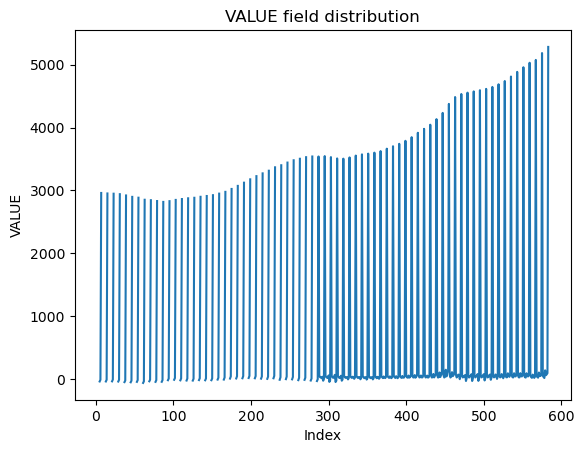

In [4]:
plt.plot(data['VALUE'])
plt.xlabel('Index')
plt.ylabel('VALUE')
plt.title("VALUE field distribution")
plt.show()

It is observed that the initail values shows less dense values then values above the index of 280. This indicates that data is missing for starting years. We check in which years we have missing values and deal with them accordingly

In [5]:
temp = [data[data['Year'] == year]['VALUE'].isna().sum() for year in data['Year'].unique()]    ## Missing value of VALUE in each Year

missing_value_years = {
    'Year': data['Year'].unique(),
    'Missing_VALUE': temp
}

temp = pd.DataFrame(missing_value_years)

temp[temp['Missing_VALUE'] != 0]

,Year,Missing_VALUE
0,1951,4
1,1952,4
2,1953,4
3,1954,4
4,1955,4
5,1956,4
6,1957,4
7,1958,4
8,1959,4
9,1960,4


This table shows that from year 1951 to 1986, VALUES field is missing for 4 Components named Annual births, Annual deaths, Immigrants and Emigrants. We have sufficient data to carry out our analysis therefore we filter data from 1986 to onwards which eliminates all missing values from our dataset

In [6]:
data = data[data['Year'] > 1986]
data.head(10)


,STATISTIC Label,Year,Component,UNIT,VALUE
288,Annual Population Change,1987,Annual births,Thousand,61.2
289,Annual Population Change,1987,Annual deaths,Thousand,32.2
290,Annual Population Change,1987,Natural increase,Thousand,29.0
291,Annual Population Change,1987,Immigrants,Thousand,17.2
292,Annual Population Change,1987,Emigrants,Thousand,40.2
293,Annual Population Change,1987,Net migration,Thousand,-23.0
294,Annual Population Change,1987,Population change,Thousand,5.9
295,Annual Population Change,1987,Population,Thousand,3546.5
296,Annual Population Change,1988,Annual births,Thousand,57.8
297,Annual Population Change,1988,Annual deaths,Thousand,31.6


 Now we will check again any missing values

In [7]:
data.isna().sum()

STATISTIC Label    0
Year               0
Component          0
UNIT               0
VALUE              0
dtype: int64

 Now our data is cleaned and ready for analysis